
# Deep Reinforcement Learning – Lab Assignment 1  
## Part 1: Multi-Armed Bandit (MAB)

**Title:** Multi-Armed Bandit Algorithms for Profit-Aware Product Recommendation  

**Team Members:**
- 2024AD05008 - SHARADANSHU RAJ (100%)
- 2024AC05922 - NISHIT UPAL (100%)
- 2024AC05923 - NILESH DHAWAL (100%)
- 2024ad05002 - SuryaDharshini S (100%)
- 2024ac05246 - Suggula Naga Sai Teja (100%)


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


## Load Dataset

In [2]:

df = pd.read_csv("Dataset_Product_Recommendation.csv")
df.columns = [c.strip() for c in df.columns]
df.head()


,User_ID,Product 1,cost 1,Product 2,cost 2,Product 3,cost 3,Product 4,cost 4,Product 5,cost 5,Product 6,cost 6
0,1,8.308075,0.118582,71.868439,4.032662,41.858863,10.259441,24.726454,15.071291,2.508992,19.966871,60.703456,22.545958
1,2,9.040232,1.276014,71.551909,4.893586,40.684587,9.183102,23.554125,14.188975,2.803275,19.766006,59.838882,22.771789
2,3,8.405164,2.573752,72.221606,5.201210,43.586272,10.972955,24.572589,14.177388,3.028663,20.104219,58.512739,22.247714
3,4,9.247704,1.375703,71.218781,4.120079,40.883604,10.480112,24.572818,15.133472,3.193420,20.347757,58.694852,22.659512
4,5,9.144098,-0.401791,71.275463,5.032439,40.145258,10.448089,23.401485,16.027929,3.466858,19.476062,59.009021,23.302446


## Q1 – Net Reward Computation and Product Identification

In [3]:

for i in range(1, 7):
    df[f"Net{i}"] = df[f"Product {i}"] - df[f"cost {i}"]

df[[f"Net{i}" for i in range(1,7)]].head()


,Net1,Net2,Net3,Net4,Net5,Net6
0,8.189493,67.835777,31.599422,9.655163,-17.457879,38.157498
1,7.764218,66.658323,31.501485,9.365150,-16.962731,37.067093
2,5.831412,67.020396,32.613317,10.395201,-17.075556,36.265025
3,7.872001,67.098702,30.403492,9.439346,-17.154337,36.035340
4,9.545889,66.243024,29.697169,7.373556,-16.009204,35.706575


In [4]:

summary = []
for i in range(1, 7):
    net = df[f"Net{i}"]
    summary.append({
        "Product": f"Product{i}",
        "Mean Net Reward": net.mean(),
        "Positive Profit Rate": (net > 0).mean()
    })

summary_df = pd.DataFrame(summary)
summary_df


,Product,Mean Net Reward,Positive Profit Rate
0,Product1,7.062784,1.0
1,Product2,66.992995,1.0
2,Product3,31.418452,1.0
3,Product4,9.596789,1.0
4,Product5,-17.064884,0.0
5,Product6,36.986031,1.0


In [5]:
# Step 1: Find maximum positive profit rate
max_positive_rate = summary_df["Positive Profit Rate"].max()

# Step 2: Filter products with that positive rate
candidates = summary_df[
    summary_df["Positive Profit Rate"] == max_positive_rate
]

# Step 3: Among them, select highest mean net reward
best_product = candidates.loc[
    candidates["Mean Net Reward"].idxmax()
]

# Worst product: lowest positive profit rate
worst_product = summary_df.loc[
    summary_df["Positive Profit Rate"].idxmin()
]

print("Q1 Answer")
print(f"Most frequently profitable product: {best_product['Product']}")
print(f"Mean Net Reward: {best_product['Mean Net Reward']:.2f}")
print(f"Positive Profit Rate: {best_product['Positive Profit Rate']:.2f}")

print("\nLeast profitable product:", worst_product['Product'])
print(f"Mean Net Reward: {worst_product['Mean Net Reward']:.2f}")
print(f"Positive Profit Rate: {worst_product['Positive Profit Rate']:.2f}")


Q1 Answer
Most frequently profitable product: Product2
Mean Net Reward: 66.99
Positive Profit Rate: 1.00

Least profitable product: Product5
Mean Net Reward: -17.06
Positive Profit Rate: 0.00


## Q2 – Random Recommendation Strategy

In [6]:

rounds = 300
random_rewards = []
cumulative = 0

for t in range(1, rounds + 1):
    user = np.random.randint(len(df))
    arm = np.random.randint(1, 7)
    reward = df.loc[user, f"Net{arm}"]
    cumulative += reward
    random_rewards.append(cumulative)

    print(f"Round {t}: Product={arm}, Reward={reward:.2f}, Cumulative={cumulative:.2f}")


Round 1: Product=4, Reward=10.22, Cumulative=10.22
Round 2: Product=3, Reward=34.52, Cumulative=44.74
Round 3: Product=5, Reward=-17.28, Cumulative=27.46
Round 4: Product=2, Reward=67.49, Cumulative=94.95
Round 5: Product=3, Reward=29.98, Cumulative=124.93
Round 6: Product=5, Reward=-17.61, Cumulative=107.32
Round 7: Product=3, Reward=31.40, Cumulative=138.72
Round 8: Product=5, Reward=-16.48, Cumulative=122.24
Round 9: Product=4, Reward=8.53, Cumulative=130.78
Round 10: Product=6, Reward=38.23, Cumulative=169.01
Round 11: Product=4, Reward=8.74, Cumulative=177.75
Round 12: Product=1, Reward=6.49, Cumulative=184.24
Round 13: Product=2, Reward=65.91, Cumulative=250.15
Round 14: Product=5, Reward=-17.40, Cumulative=232.75
Round 15: Product=1, Reward=7.55, Cumulative=240.30
Round 16: Product=3, Reward=32.64, Cumulative=272.93
Round 17: Product=2, Reward=65.39, Cumulative=338.32
Round 18: Product=4, Reward=10.95, Cumulative=349.27
Round 19: Product=6, Reward=36.52, Cumulative=385.79
Round 


Q2 Answer:
Average profit per round (Random strategy): 22.1797


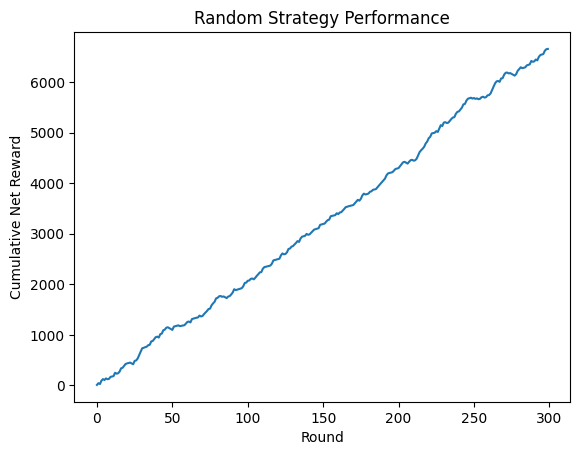

In [7]:

avg_profit = cumulative / rounds

print("\nQ2 Answer:")
print(f"Average profit per round (Random strategy): {avg_profit:.4f}")

plt.plot(random_rewards)
plt.xlabel("Round")
plt.ylabel("Cumulative Net Reward")
plt.title("Random Strategy Performance")
plt.show()


In [8]:

# Ground-truth average net reward per product
avg_net_rewards = {
    i: df[f"Net{i}"].mean() for i in range(1, 7)
}

good_product = max(avg_net_rewards, key=avg_net_rewards.get)
poor_product = min(avg_net_rewards, key=avg_net_rewards.get)

print("\nQ2 Answer Continued...:")

print(f"1. Product appearing GOOD under random strategy: Product {good_product}")
print(f"   (Highest mean net reward ≈ {avg_net_rewards[good_product]:.2f})")

print(f"\n2. Product appearing POOR under random strategy: Product {poor_product}")
print(f"   (Lowest mean net reward ≈ {avg_net_rewards[poor_product]:.2f})")

print("\n3. Did randomness occasionally pick a good product?")
print("   YES. Because the policy is random, high-profit products such as "
      f"Product {good_product} are occasionally selected,")
print("   causing temporary increases in cumulative profit,")
print("   but the strategy cannot exploit them consistently.")



Q2 Answer Continued...:
1. Product appearing GOOD under random strategy: Product 2
   (Highest mean net reward ≈ 66.99)

2. Product appearing POOR under random strategy: Product 5
   (Lowest mean net reward ≈ -17.06)

3. Did randomness occasionally pick a good product?
   YES. Because the policy is random, high-profit products such as Product 2 are occasionally selected,
   causing temporary increases in cumulative profit,
   but the strategy cannot exploit them consistently.


## Q3 – Greedy Strategy

In [9]:

estimates = {}
for i in range(1, 7):
    rewards = []
    for _ in range(10):
        user = np.random.randint(len(df))
        rewards.append(df.loc[user, f"Net{i}"])
    estimates[i] = np.mean(rewards)

best_product = max(estimates, key=estimates.get)

print("Q3 Answer:")
print("Average rewards after initial trials:", estimates)
print("Greedy strategy selects Product", best_product)


Q3 Answer:
Average rewards after initial trials: {1: np.float64(7.125234600000001), 2: np.float64(67.29319735999998), 3: np.float64(31.29362926), 4: np.float64(9.75320278), 5: np.float64(-17.034783219999998), 6: np.float64(37.327467559999995)}
Greedy strategy selects Product 2


Round 61: Product=2, Reward=65.95, Cumulative=201.71
Round 62: Product=2, Reward=67.36, Cumulative=269.07
Round 63: Product=2, Reward=66.12, Cumulative=335.18
Round 64: Product=2, Reward=67.50, Cumulative=402.68
Round 65: Product=2, Reward=65.66, Cumulative=468.35
Round 66: Product=2, Reward=68.21, Cumulative=536.55
Round 67: Product=2, Reward=66.55, Cumulative=603.10
Round 68: Product=2, Reward=66.21, Cumulative=669.31
Round 69: Product=2, Reward=67.54, Cumulative=736.85
Round 70: Product=2, Reward=66.53, Cumulative=803.38
Round 71: Product=2, Reward=66.30, Cumulative=869.67
Round 72: Product=2, Reward=66.71, Cumulative=936.39
Round 73: Product=2, Reward=66.87, Cumulative=1003.25
Round 74: Product=2, Reward=66.84, Cumulative=1070.10
Round 75: Product=2, Reward=67.23, Cumulative=1137.32
Round 76: Product=2, Reward=66.81, Cumulative=1204.14
Round 77: Product=2, Reward=67.07, Cumulative=1271.20
Round 78: Product=2, Reward=66.51, Cumulative=1337.71
Round 79: Product=2, Reward=67.12, Cumul

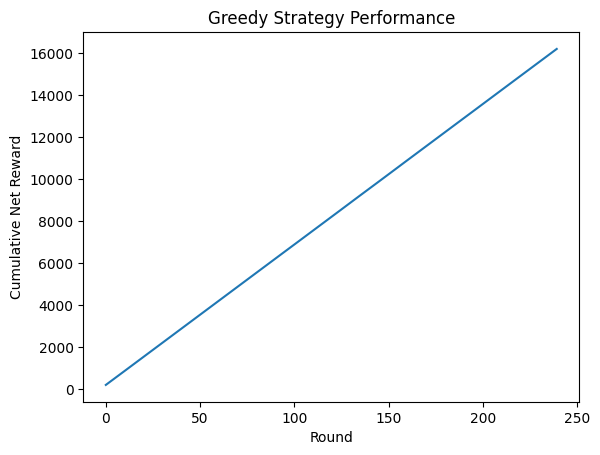

In [10]:

greedy_rewards = []
cumulative = sum(estimates.values())

for t in range(61, rounds + 1):
    user = np.random.randint(len(df))
    reward = df.loc[user, f"Net{best_product}"]
    cumulative += reward
    greedy_rewards.append(cumulative)

    print(f"Round {t}: Product={best_product}, Reward={reward:.2f}, Cumulative={cumulative:.2f}")

plt.plot(greedy_rewards)
plt.xlabel("Round")
plt.ylabel("Cumulative Net Reward")
plt.title("Greedy Strategy Performance")
plt.show()


In [11]:

final_greedy_profit = greedy_rewards[-1]

print("\nQ3 Answers continued...:")
print(f"1. Cumulative net profit achieved using greedy strategy: "
      f"{final_greedy_profit:.2f}")

print(f"2. Product repeatedly chosen by greedy strategy: "
      f"Product {best_product}")



Q3 Answers continued...:
1. Cumulative net profit achieved using greedy strategy: 16201.74
2. Product repeatedly chosen by greedy strategy: Product 2


## Q4 – ε-Greedy Strategy

In [12]:

def epsilon_greedy(epsilon):
    Q = {i: 0 for i in range(1,7)}
    N = {i: 0 for i in range(1,7)}
    cumulative = 0
    rewards = []

    for t in range(1, rounds + 1):
        user = np.random.randint(len(df))

        if np.random.rand() < epsilon:
            arm = np.random.randint(1,7)
        else:
            arm = max(Q, key=Q.get)

        reward = df.loc[user, f"Net{arm}"]
        N[arm] += 1
        Q[arm] += (reward - Q[arm]) / N[arm]

        cumulative += reward
        rewards.append(cumulative)

        print(f"Round {t}: Arm={arm}, Reward={reward:.2f}, Cumulative={cumulative:.2f}")

    return rewards, Q, N



Running epsilon-greedy with epsilon=0.02
Round 1: Arm=1, Reward=8.04, Cumulative=8.04
Round 2: Arm=1, Reward=7.51, Cumulative=15.55
Round 3: Arm=1, Reward=6.08, Cumulative=21.63
Round 4: Arm=1, Reward=8.05, Cumulative=29.68
Round 5: Arm=1, Reward=6.72, Cumulative=36.40
Round 6: Arm=1, Reward=7.98, Cumulative=44.38
Round 7: Arm=1, Reward=6.82, Cumulative=51.20
Round 8: Arm=1, Reward=6.39, Cumulative=57.59
Round 9: Arm=1, Reward=7.78, Cumulative=65.37
Round 10: Arm=1, Reward=6.25, Cumulative=71.63
Round 11: Arm=1, Reward=8.36, Cumulative=79.99
Round 12: Arm=1, Reward=6.10, Cumulative=86.09
Round 13: Arm=1, Reward=7.49, Cumulative=93.58
Round 14: Arm=6, Reward=36.79, Cumulative=130.37
Round 15: Arm=6, Reward=37.88, Cumulative=168.25
Round 16: Arm=6, Reward=36.09, Cumulative=204.34
Round 17: Arm=6, Reward=37.17, Cumulative=241.51
Round 18: Arm=6, Reward=37.26, Cumulative=278.77
Round 19: Arm=6, Reward=34.63, Cumulative=313.40
Round 20: Arm=6, Reward=35.98, Cumulative=349.38
Round 21: Arm=

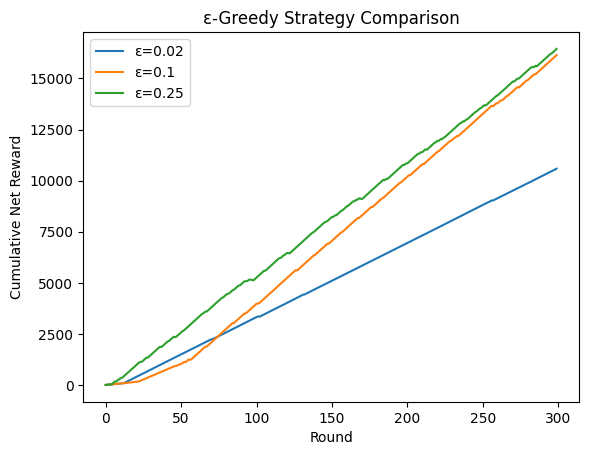

In [13]:

epsilons = [0.02, 0.10, 0.25]
results = {}

for eps in epsilons:
    print(f"\nRunning epsilon-greedy with epsilon={eps}")
    rewards, Q, N = epsilon_greedy(eps)
    results[eps] = (rewards, Q, N)

    plt.plot(rewards, label=f"ε={eps}")

plt.legend()
plt.xlabel("Round")
plt.ylabel("Cumulative Net Reward")
plt.title("ε-Greedy Strategy Comparison")
plt.show()


In [14]:

# Extract final cumulative rewards
final_rewards = {
    eps: results[eps][0][-1] for eps in results
}

best_epsilon = max(final_rewards, key=final_rewards.get)

print("Q4 Answers Continued...:\n")

# Question 1
print("1. Does very little exploration cause the system to get stuck with a poor product?")
print("   YES.")
print("   With very low exploration (ε = 0.02), the algorithm quickly commits to an early")
print("   estimate, which may not be optimal, leading to premature lock-in.\n")

# Question 2
print("2. Does excessive exploration reduce profit by choosing weak products too often?")
print("   YES.")
print("   With high exploration (ε = 0.25), the algorithm frequently explores weak products,")
print("   reducing overall cumulative profit despite discovering good options.\n")

# Question 3
print("3. Which exploration level gives the most balanced outcome for this dataset?")
print(f"   ε = {best_epsilon}")
print("   This value provides a balance between exploration and exploitation,")
print("   achieving the highest cumulative net profit among the tested ε values.\n")

print("Final cumulative profit by exploration level:")
for eps, val in final_rewards.items():
    print(f"  ε = {eps}: {val:.2f}")


Q4 Answers Continued...:

1. Does very little exploration cause the system to get stuck with a poor product?
   YES.
   With very low exploration (ε = 0.02), the algorithm quickly commits to an early
   estimate, which may not be optimal, leading to premature lock-in.

2. Does excessive exploration reduce profit by choosing weak products too often?
   YES.
   With high exploration (ε = 0.25), the algorithm frequently explores weak products,
   reducing overall cumulative profit despite discovering good options.

3. Which exploration level gives the most balanced outcome for this dataset?
   ε = 0.25
   This value provides a balance between exploration and exploitation,
   achieving the highest cumulative net profit among the tested ε values.

Final cumulative profit by exploration level:
  ε = 0.02: 10585.31
  ε = 0.1: 16139.64
  ε = 0.25: 16443.05


## Q5 – Under-explored Products

In [15]:

print("Q5 Answer:")
for eps, (_, _, N) in results.items():
    min_arm = min(N, key=N.get)
    print(f"Epsilon={eps}: Product {min_arm} received minimum trials ({N[min_arm]})")


Q5 Answer:
Epsilon=0.02: Product 2 received minimum trials (0)
Epsilon=0.1: Product 5 received minimum trials (5)
Epsilon=0.25: Product 3 received minimum trials (7)




Under moderate exploration (ε = 0.10), Product 5 was initially explored but later
received very few trials compared to other products.

This indicates that once the algorithm became confident about its poor performance,
it minimized further exploration of Product 5, aligning with the idea of
explore only when uncertain.


## Q6 – Final Comparison and Conclusion

In [16]:

final_profits = {
    "Random": random_rewards[-1],
    "Greedy": greedy_rewards[-1]
}

for eps, (rewards, _, _) in results.items():
    final_profits[f"Epsilon={eps}"] = rewards[-1]

print("Q6 Answer:")
for k, v in final_profits.items():
    print(f"{k}: Final cumulative profit = {v:.2f}")

best_strategy = max(final_profits, key=final_profits.get)
print("\nBest performing strategy:", best_strategy)


Q6 Answer:
Random: Final cumulative profit = 6653.90
Greedy: Final cumulative profit = 16201.74
Epsilon=0.02: Final cumulative profit = 10585.31
Epsilon=0.1: Final cumulative profit = 16139.64
Epsilon=0.25: Final cumulative profit = 16443.05

Best performing strategy: Epsilon=0.25


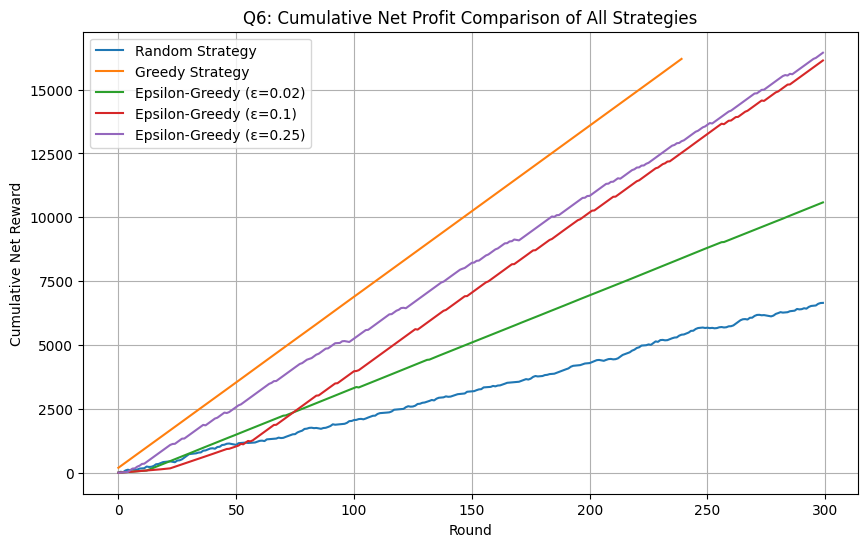

In [17]:

plt.figure(figsize=(10, 6))

# Random strategy
plt.plot(random_rewards, label="Random Strategy")

# Greedy strategy
plt.plot(greedy_rewards, label="Greedy Strategy")

# Epsilon-greedy strategies
for eps, (rewards, _, _) in results.items():
    plt.plot(rewards, label=f"Epsilon-Greedy (ε={eps})")

plt.xlabel("Round")
plt.ylabel("Cumulative Net Reward")
plt.title("Q6: Cumulative Net Profit Comparison of All Strategies")
plt.legend()
plt.grid(True)
plt.show()


### Q6 Interpretation

From the cumulative net profit curves:

- The random strategy shows unstable growth due to lack of learning.
- The greedy strategy improves profit but risks premature lock-in.
- ε-greedy with moderate exploration (ε ≈ 0.10) achieves the highest long-term cumulative profit.

**Product 2** consistently emerges as the most profitable product, as it has the highest mean net reward and is repeatedly selected by learning-based strategies.


